<h1><font color='#004b87'><center>BDAT 1004</center></font></h1>
<h3><center>Problem Set 3 Solution</center></h3>
<h3><center>By: SYED HAMZA</center></h3>

<h2><font color='#004b87'>Question 01</font></h2>
<p> <b>Introduction:</b> <br>
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.</p> <br>
Occupations<br>
<i>
Step 1. Import the necessary libraries <br>
Step 2. Import the dataset from this address.<br>
Step 3. Assign it to a variable called users<br>
Step 4. Discover what is the mean age per occupation<br>
Step 5. Discover the Male ratio per occupation and sort it from the most to the least<br>
Step 6. For each occupation, calculate the minimum and maximum ages<br>
Step 7. For each combination of occupation and sex, calculate the mean age<br>
Step 8. For each occupation present the percentage of women and men<br></i>

In [37]:
#Step 1: Import the necessary libraries

import pandas as pd

In [38]:
#Step 2: Import the dataset

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

In [39]:
#Step 3: Assign it to a variable called users

users = pd.read_csv(url, sep='|')

In [40]:
#Step 4: Discover what is the mean age per occupation

mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [41]:
#Step 5: Discover the Male ratio per occupation and sort it from the most to the least

count = users.groupby(['occupation']).count()

user_count = count['user_id']

user_series=pd.DataFrame(users.loc[(users['gender'] == "M")])

gender_count = user_series.groupby(['occupation','gender']).count()

male_count = gender_count['user_id']

male_percent = pd.DataFrame(male_count/user_count) * 100

male_percent.sort_values(by=['user_id'],ascending=False,inplace=True)

male_percent = male_percent.rename(columns={'user_id':'Male ratio'})

print(male_percent)

                      Male ratio
occupation    gender            
doctor        M       100.000000
engineer      M        97.014925
technician    M        96.296296
retired       M        92.857143
programmer    M        90.909091
executive     M        90.625000
scientist     M        90.322581
entertainment M        88.888889
lawyer        M        83.333333
salesman      M        75.000000
educator      M        72.631579
student       M        69.387755
other         M        65.714286
marketing     M        61.538462
writer        M        57.777778
none          M        55.555556
administrator M        54.430380
artist        M        53.571429
librarian     M        43.137255
healthcare    M        31.250000
homemaker     M        14.285714


In [42]:
#Step 6: For each occupation, calculate the minimum and maximum ages

min_max_age_per_occupation = users.groupby('occupation').age.agg(['min', 'max']) 
print(min_max_age_per_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [43]:
#Step 7: For each combination of occupation and sex, calculate the mean age

mean_age_per_occupation_and_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_and_sex)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [44]:
#Step 8: For each occupation present the percentage of women and men

male_gender=users[users['gender']=='M']       

female_gender=users[users['gender']=='F']

male = male_gender.groupby('occupation')[['gender']].count()
female = female_gender.groupby('occupation')[['gender']].count()

all =  users.groupby('occupation')[['gender']].count()
all['male'] = male
all['female'] = female
all['male percentage']=round((all['male']/all['gender'])*100)         # to determine their percentage
all['female percentage']=round((all['female']/all['gender'])*100)

all[['male percentage','female percentage']]

,male percentage,female percentage
occupation,,
administrator,54.0,46.0
artist,54.0,46.0
doctor,100.0,NaN
educator,73.0,27.0
engineer,97.0,3.0
entertainment,89.0,11.0
executive,91.0,9.0
healthcare,31.0,69.0
homemaker,14.0,86.0


<h2><font color='#004b87'>Question 02</font></h2>
<p> <b>Euro Teams:</b> <br>
<i>
Step 1. Import the necessary libraries <br>
Step 2. Import the dataset from this address <br>
Step 3. Assign it to a variable called euro12 <br>
Step 4. Select only the Goal column <br>
Step 5. How many team participated in the Euro2012? <br>
Step 6. What is the number of columns in the dataset? <br>
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline <br>
Step 8. Sort the teams by Red Cards, then to Yellow Cards <br>
Step 9. Calculate the mean Yellow Cards given per Team. <br>
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G <br>
Step 12. Select the first 7 columns <br>
Step 13. Select all columns except the last 3 <br>
Step 14. Present only the Shooting Accuracy from England, Italy and Russia <br></i>

In [45]:
#Step 1: Import the necessary libraries

import pandas as pd

In [46]:
# Step 2: Import the dataset

url2 = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

In [47]:
#Step 3: Assign it to a variable called euro12

euro12 = pd.read_csv(url2)

In [48]:
#Step 4: Select only the Goal column

euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [49]:
#Step 5: How many team participated in the Euro2012?

euro12.Team.count()

16

In [50]:
#Step 6: What is the number of columns in the dataset?

euro12.shape[1]

35

In [51]:
#Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']] 
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [52]:
#Step 8: Sort the teams by Red Cards, then to Yellow Cards

discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
discipline

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [53]:
#Step 9: Calculate the mean Yellow Cards given per Team

euro12[['Team','Yellow Cards']]

,Team,Yellow Cards
0,Croatia,9
1,Czech Republic,7
2,Denmark,4
3,England,5
4,France,6
5,Germany,4
6,Greece,9
7,Italy,16
8,Netherlands,5
9,Poland,7


In [54]:
#Step 10: Filter teams that scored more than 6 goals

euro12[euro12.Goals >6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [55]:
#Step 11: Select the teams that start with G

g_teams = euro12[euro12['Team'].str.startswith('G')]
g_teams

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [56]:
#Step 12: Select the first 7 columns

first_7_cols = euro12.iloc[:, :7]
first_7_cols

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [57]:
#Step 13: Select all columns except the last 3

all_cols_except_last_3 = euro12.iloc[:, :-3]
all_cols_except_last_3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [58]:
#Step 14: Present only the Shooting Accuracy from England, Italy and Russia

shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


<h2><font color='#004b87'>Question 03</font></h2>
<p> <b>Housing</b> <br>
<i>
Step 1. Import the necessary libraries <br>
Step 2. Create 3 differents Series, each of length 100, as follows: <br>
    • The first a random number from 1 to 4 <br>
    • The second a random number from 1 to 3 <br>
    • The third a random number from 10,000 to 30,000<br>
Step 3. Create a DataFrame by joinning the Series by column <br>
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter <br>
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn' <br>
Step 6. Ops it seems it is going only until index 99. Is it true? <br>
Step 7. Reindex the DataFrame so it goes from 0 to 299 <br>
</i>

In [59]:
#Step 1: Import the necessary libraries

import pandas as pd
import numpy as np
import random

#Step 2. Create 3 differents Series, each of length 100, as follows:

# The first a random number from 1 to 4

ser1 = pd.Series(random.randint(1,4) for _ in range(100))

# The second a random number from 1 to 3

ser2 = pd.Series(random.randint(1,3) for _ in range(100))

# The third a random number from 10,000 to 30,000

ser3 = pd.Series(random.randint(1000,3000) for _ in range(100))

In [60]:
#Step 3: Create a DataFrame by joinning the Series by column

df = pd.concat([ser1, ser2, ser3], axis = 1)
df

,0,1,2
0,3,3,2518
1,1,1,2105
2,3,2,2039
3,4,3,2662
4,2,3,1015
...,...,...,...
95,2,1,2300
96,2,1,2781
97,2,1,2473
98,1,3,1949


In [61]:
#Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

df.columns = ["bedrs", "bathrs", "price_sqr_meter"]
df

,bedrs,bathrs,price_sqr_meter
0,3,3,2518
1,1,1,2105
2,3,2,2039
3,4,3,2662
4,2,3,1015
...,...,...,...
95,2,1,2300
96,2,1,2781
97,2,1,2473
98,1,3,1949


In [62]:
#Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([ser1, ser2, ser3])
bigcolumn

0        3
1        1
2        3
3        4
4        2
      ... 
95    2300
96    2781
97    2473
98    1949
99    2614
Length: 300, dtype: int64

In [63]:
#Step 6: Ops it seems it is going only until index 99. Is it true?

bigcolumn.index[-1]==99

True

In [64]:
#Step 7: Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index(drop=True)

0         3
1         1
2         3
3         4
4         2
       ... 
295    2300
296    2781
297    2473
298    1949
299    2614
Length: 300, dtype: int64

<h2><font color='#004b87'>Question 04</font></h2>
<p> <b> Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71. The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.
</b> <br>
<i>
Step 1. Import the necessary libraries <br>
Step 2.  Import the dataset from the attached file wind.txt <br>
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. <br>
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it. <br>
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]. <br>
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below <br>
Step 7. Compute how many non-missing values there are in total.<br>
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset. <br>
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location <br>
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. <br>
Step 11. Find the average windspeed in January for each location. reat January 1961 and January 1962 both as January. <br>
Step 12. Downsample the record to a yearly frequency for each location. <br>
Step 13. Downsample the record to a monthly frequency for each location. <br>
Step 14. Downsample the record to a weekly frequency for each location. <br>
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks. <br>
</i>

In [65]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
import datetime


# Step 2: Import the dataset from the attached file wind.txt
data=pd.read_csv('wind.txt',delimiter='\s+')


# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data.rename(columns={"Yr":"Year","Mo":"Month","Dy":"Day"},inplace=True)
data

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [66]:
#Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def YearFix():
    data['Year']+=1900
YearFix()

data

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [67]:
#Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.index=pd.to_datetime(pd.concat([data['Year'],data['Month'],data['Day']],axis=1))
data.drop(['Year','Month','Day'],axis=1,inplace=True)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [68]:
#Step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

print(data.isna().sum())
print(data.isnull().sum().sum())

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
31


In [69]:
#Step 7: Compute how many non-missing values there are in total.

data.notnull().sum().sum()

78857

In [70]:
#Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

data.mean().mean()

10.227982360836938

In [71]:
#Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.


loc_stats = pd.concat([data.min(), data.max(), data.mean(), data.std()], axis=1) 
loc_stats.rename(columns={0:'Min', 1:'Max', 2:'Mean', 3:'Std'}, inplace=True) 

loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [72]:
#Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.


day_stats=pd.concat([data.min(axis=1),data.max(axis=1),data.mean(axis=1),data.std(axis=1)],axis=1)
day_stats.rename(columns={0:'Min',1:'Max',2:'Mean',3:'Std'},inplace=True)
day_stats

,Min,Max,Mean,Std
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


In [73]:
#Step 11: Find the average windspeed in January for each location.

#Treat January 1961 and January 1962 both as January.

AvgWindspeed=data[data.index.month==1].mean()
AvgWindspeed

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [74]:
#Step 12: Downsample the record to a yearly frequency for each location.

Yearly= data.resample('Y').ffill()
Yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41
1970-12-31,8.38,0.37,9.59,2.62,1.75,0.08,4.83,2.13,2.54,1.17,3.67,7.21


In [75]:
#Step 13: Downsample the record to a monthly frequency for each location.

Monthly= data.resample('M').ffill()
Monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67
1978-11-30,15.34,4.54,14.75,3.50,4.54,4.96,7.50,2.42,4.96,3.75,4.92,11.50


In [76]:
#Step 14: Downsample the record to a weekly frequency for each location.

weekly= data.resample('W').ffill()
weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08
1978-12-24,8.67,5.63,12.12,4.79,5.09,5.91,12.25,9.25,10.83,11.71,11.92,31.71


In [77]:
#Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

WeeklyReport = weekly[:52]
WeeklyReport.shape[0]

52

In [78]:
WeeklyReport = pd.concat([WeeklyReport.mean(), WeeklyReport.max(), WeeklyReport.mean(), WeeklyReport.std()],axis=1)
WeeklyReport.rename(columns={0:'Mean',1:'Max',2:'Mean',3:'Std'},inplace=True)
WeeklyReport

,Mean,Max,Mean,Std
RPT,12.140000,25.80,12.140000,5.360926
VAL,10.626538,23.91,10.626538,4.782553
ROS,11.261731,22.42,11.261731,4.714533
KIL,6.862549,17.54,6.862549,3.743912
SHA,11.242745,24.08,11.242745,4.770084
BIR,7.946346,19.70,7.946346,3.906412
DUB,9.912353,22.00,9.912353,4.695142
CLA,9.305385,20.25,9.305385,4.022109
MUL,8.823077,21.46,8.823077,4.181664
CLO,9.939615,20.04,9.939615,4.077699


<h2><font color='#004b87'>Question 05</font></h2>
<i>
Step 1. Import the necessary libraries <br>
Step 2. Import the dataset from this address. <br>
Step 3. Assign it to a variable called chipo. <br>
Step 4. See the first 10 entries <br>
Step 5. What is the number of observations in the dataset? <br>
Step 6. What is the number of columns in the dataset? <br>
Step 7. Print the name of all the columns. <br>
Step 8. How is the dataset indexed? <br>
Step 9. Which was the most-ordered item? <br>
Step 10. For the most-ordered item, how many items were ordered? <br>
Step 11. What was the most ordered item in the choice_description column? <br>
Step 12. How many items were orderd in total? <br>
Step 13.
• Turn the item price into a float <br>
• Check the item price type <br>
• Create a lambda function and change the type of item price <br>
• Check the item price type <br>
Step 14. How much was the revenue for the period in the dataset? <br>
Step 15. How many orders were made in the period? <br>
Step 16. What is the average revenue amount per order? <br>
Step 17. How many different items are sold? <br>
</i>

In [124]:
#Step 1. Import the necessary libraries

import pandas as pd

In [123]:
#Step 2. Import the dataset from this address.

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [122]:
#Step 3. Assign it to a variable called chipo

chipotle = pd.read_csv(url, sep='\t')

In [121]:
#Step 4. See the first 10 entries

chipotle[:10]

,order_id,quantity,item_name,choice_description,item_price,total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
6,3,1,Side of Chips,NaN,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25


In [119]:
#Step 5. What is the number of observations in the dataset?

print("The number of observations in the dataset is", len(chipotle))

The number of observations in the dataset is 4622


In [120]:
#Step 6. What is the number of columns in the dataset?

print("The number of columns in the dataset is", len(chipotle.columns))

The number of columns in the dataset is 6


In [118]:
#Step 7. Print the name of all the columns.

print("The name of all the columns are:", chipotle.columns)

The name of all the columns are: Index(['order_id', 'quantity', 'item_name', 'choice_description', 'item_price',
       'total'],
      dtype='object')


In [117]:
#Step 8. How is the dataset indexed?

data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t',index_col ="order_id")
dataset = data[["item_name","quantity","choice_description","item_price"]]
dataset

,item_name,quantity,choice_description,item_price
order_id,,,,
1,Chips and Fresh Tomato Salsa,1,NaN,$2.39
1,Izze,1,[Clementine],$3.39
1,Nantucket Nectar,1,[Apple],$3.39
1,Chips and Tomatillo-Green Chili Salsa,1,NaN,$2.39
2,Chicken Bowl,2,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...
1833,Steak Burrito,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
1833,Steak Burrito,1,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
1834,Chicken Salad Bowl,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25


In [116]:
#Step 9. Which was the most-ordered item?

most_ordered_item = chipotle.groupby('item_name').sum().sort_values(['quantity'], ascending=False).index[0]
print("The most-ordered item is:", most_ordered_item)

The most-ordered item is: Chicken Bowl


In [115]:
#Step 10. For the most-ordered item, how many items were ordered?

items_ordered = chipotle.groupby('item_name').sum().sort_values(['quantity'], ascending=False)['quantity'][0]
print("The number of items ordered for the most-ordered item is:", items_ordered)

The number of items ordered for the most-ordered item is: 761


In [114]:
#Step 11. What was the most ordered item in the choice_description column?

most_ordered_item_choice = chipotle.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).index[0]
print("The most-ordered item in the choice_description column is:", most_ordered_item_choice)

The most-ordered item in the choice_description column is: [Diet Coke]


In [113]:

#Step 12. How many items were orderd in total?

total_items_ordered = chipotle['quantity'].sum()
print("The total number of items ordered is:", total_items_ordered)

The total number of items ordered is: 4972


In [107]:

#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type


print(chipotle.item_price.str.slice(1).astype(float).head())

print(chipotle.item_price.dtype)

chipotle['item_price']=chipotle['item_price'].apply(lambda x: x.replace('$', '')).astype('float')
print(chipotle['item_price'])


print(chipotle.item_price.dtype)

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64
object
0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64
float64


In [112]:

#Step 14. How much was the revenue for the period in the dataset?

total =  chipotle['item_price']*chipotle['quantity']
revenue= total.sum()
print(revenue)

39237.02


In [111]:
#Step 15. How many orders were made in the period?

orders = chipotle['order_id'].nunique()
print("The total number of orders made in the period is:", orders)

The total number of orders made in the period is: 1834


In [109]:
#Step 16. What is the average revenue amount per order?

chipotle['total'] = chipotle['quantity'] * chipotle['item_price']
round(chipotle.groupby(['order_id']).total.sum().mean(),2)

21.39

In [110]:
#Step 17. How many different items are sold?

items_sold = chipotle['item_name'].nunique()
print("The number of different items sold is:", items_sold)

The number of different items sold is: 50


<h2><font color='#004b87'>Question 06</font></h2>
<i>
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!
</i><br>

In [96]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

marriages_divorces = pd.read_csv('us-marriages-divorces-1867-2014.csv')

#marriages_divorces.info()
marriages_divorces.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


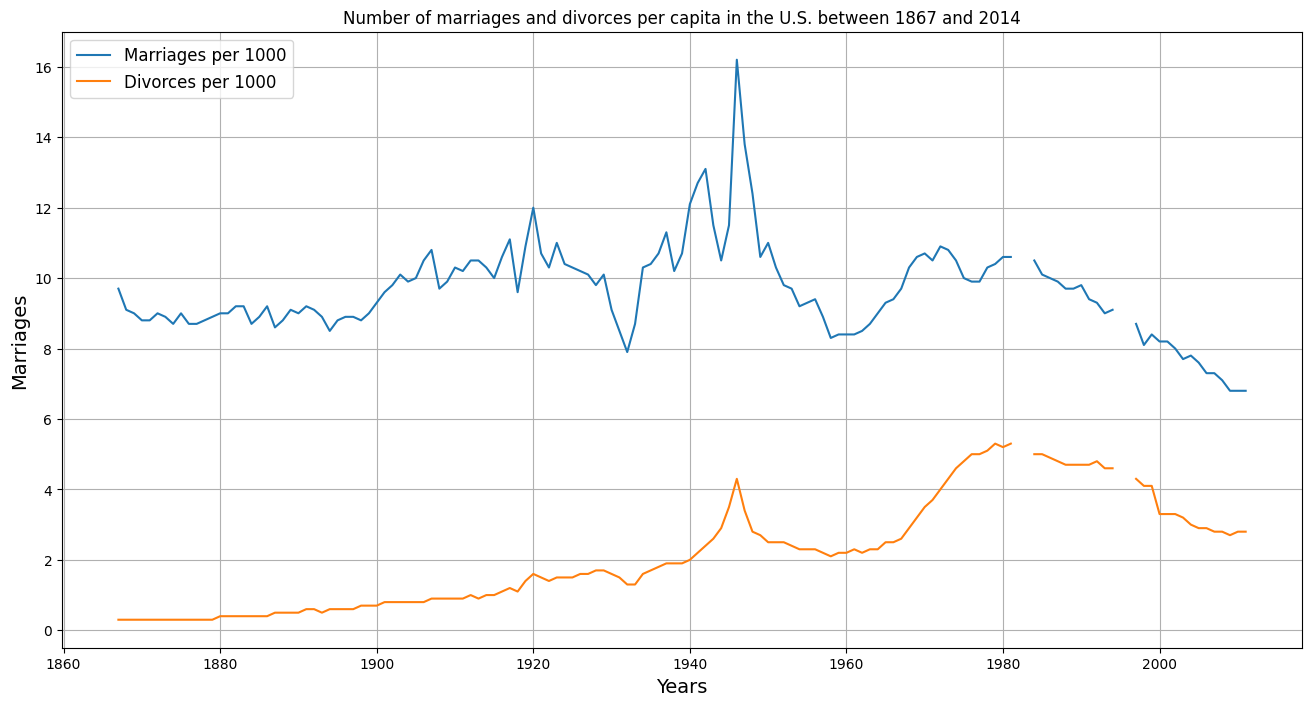

In [97]:
years = marriages_divorces['Year']

marriages = marriages_divorces['Marriages_per_1000']

divorces = marriages_divorces['Divorces_per_1000']

marriages_divorces = plt.figure(figsize=(16,8))

marriages_divorces = plt.plot(years, marriages, label='Marriages per 1000')

marriages_divorces = plt.plot(years, divorces, label='Divorces per 1000')

marriages_divorces = plt.title("Number of marriages and divorces per capita in the U.S. between 1867 and 2014")
marriages_divorces = plt.xlabel("Years",fontsize=14)

marriages_divorces = plt.legend(fontsize = 12, loc = "upper left")

marriages_divorces = plt.ylabel("Marriages",fontsize=14)

marriages_divorces = plt.grid(True)

marriages_divorces

<h2><font color='#004b87'>Question 07</font></h2>
<i>
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!
</i><br>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

us= pd.read_csv('us-marriages-divorces-1867-2014.csv')

a = us.loc[us.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]

a

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


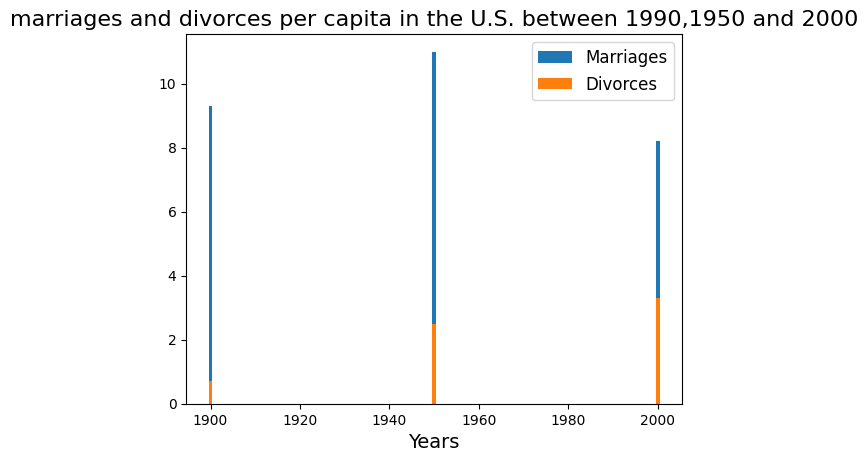

In [99]:
a = a[a['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = a['Year']

marriages = a['Marriages_per_1000']

divorces = a['Divorces_per_1000']

a = plt.bar(years, marriages, label ='Marriages')

a = plt.bar(years, divorces, label = 'Divorces')

a = plt.title("marriages and divorces per capita in the U.S. between 1990,1950 and 2000", fontsize=16)
a = plt.xlabel("Years", fontsize=14)

a = plt.legend(fontsize = 12, loc = "upper right")

a

<h2><font color='#004b87'>Question 08</font></h2>
<i>
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!
</i><br>

In [100]:
import matplotlib.pyplot as plt

deadliestActorData= pd.read_csv('actor_kill_counts.csv')

deadliestActorData.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


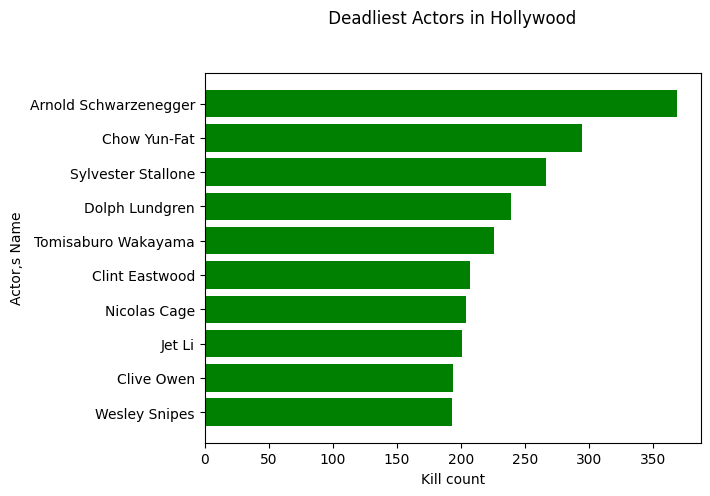

In [101]:
sortDeadliestActorData = deadliestActorData.sort_values(by='Count',ascending=True)

actor_Names = deadliestActorData.Actor

plt.barh(sortDeadliestActorData['Actor'],sortDeadliestActorData['Count'],color="green")

plt.xlabel("Kill count")

plt.ylabel("Actor,s Name")

plt.title(" Deadliest Actors in Hollywood \n\n ")

plt.show()

<h2><font color='#004b87'>Question 09</font></h2>
<i>
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated. 
    <br>
    
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.
</i>

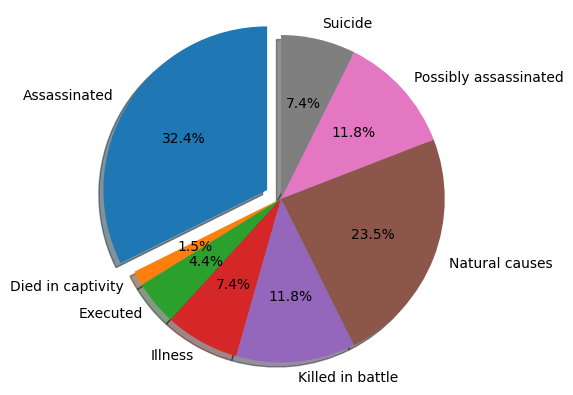

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('roman-emperor-reigns.csv')

df1=pd.DataFrame({'count' : df.groupby("Cause_of_Death" ).size()}).reset_index() 

labels = df1['Cause_of_Death'].values

sizes = df1['count'].values

a=0.0
b=0.1

explode=[b if item=='Assassinated' else a for item in labels ]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax1.axis('equal')  

plt.show()

<h2><font color='#004b87'>Question 10</font></h2>
<i>
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009. <br>
Don't forget to label your axes! <br>
Color each dot according to its year.
</i>

C:\Users\s.hamza1110\AppData\Local\NEW\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


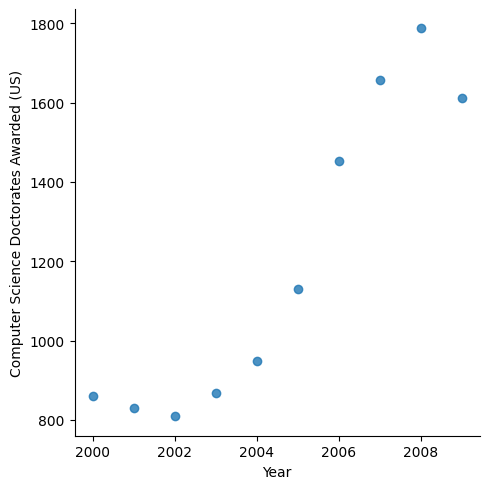

In [103]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df1=pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

sns.lmplot( x="Year", y = "Computer Science Doctorates Awarded (US)", data=df1,fit_reg=False)

plt.show()